# Dumb Regression for Predicting House Price
## Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

## Import Data

In [2]:
train = pd.read_csv('https://s3.amazonaws.com/researchdatafiles/train.csv')
test = pd.read_csv('https://s3.amazonaws.com/researchdatafiles/test.csv')

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Applying Linear Regression on LotArea

Let's consider just LotArea as X for the moment. First, let's divide the raw data into training data and validation data.

In [3]:
clean_dataset= train[['LotArea', 'SalePrice']]
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(clean_dataset.loc[:, clean_dataset.columns != 'SalePrice'], clean_dataset.SalePrice, test_size=0.33, random_state = 5)
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((978, 1), (978,), (482, 1), (482,))

### Observe the relationship between LotArea and SalePrice

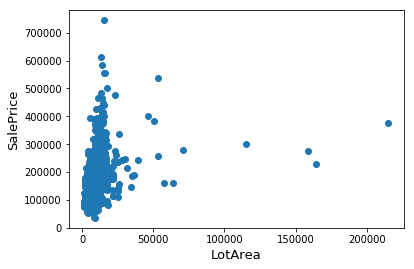

In [4]:
fig,ax = plt.subplots()
ax.scatter(x = x_train, y = y_train)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

In [5]:
#let's consider just LotArea as X for the moment

from sklearn.linear_model import LinearRegression
skl=LinearRegression()
skl.fit(x_train, y_train)
print("sklearn coefficients: " + str([skl.coef_,skl.intercept_]))

sklearn coefficients: [array([1.76045908]), 162782.69913026266]


In [6]:
skl.score(x_valid, y_valid)

0.07774422231089195

In [7]:
#Calculating RMSE score
from sklearn.metrics import mean_squared_error
y_pred = skl.predict(x_valid)
rmse = mean_squared_error(np.nan_to_num(np.log(y_valid)), np.nan_to_num(np.log(y_pred)))
print ("The RMSE score for validation is: " + str(rmse))

The RMSE score for validation is: 0.14784110313994347


## Looks good? Really?

Let's try it on the test data and upload it for evaluation.

In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
#let's try it on the test data
x_test=np.array(test['LotArea'])

skl=LinearRegression()
skl.fit(x_train, y_train)

y_test = skl.predict(np.reshape(x_test, (len(x_test),1)))

In [10]:
id=np.reshape(np.array(test['Id']),(len(x_test),1))
y_result = np.reshape(y_test, (len(x_test),1))
r = [[int(id[i]), y_result[i][0]] for i in range(len(id))]
df = pd.DataFrame(r)
df.columns = ['Id', 'SalePrice']
out = df.to_csv('out.csv', index=False)

Upload `'out.csv'` to the submission site and check the score : )

Trust me, you can do better than this!